In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision as tv
import dataloaders
from PIL import Image

In [6]:
use_cuda = True

if use_cuda and torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

pin_memory = True
use_multi_process_data_loading = True
# Multi Process Data Loading
if use_multi_process_data_loading:
    num_threats = torch.get_num_threads()
    print("Number of Threats: ", num_threats)
else:
    num_threats = 0
    print("Not using Multi-Process Data Loading.")

TABLE_PATH = os.path.join('..','data','tmdb-movies-220915-clean.pkl')
DATA_PATH = os.path.join('..','data', 'tmdb')
BATCH_SIZE = 10

Number of Threats:  8


In [7]:
transform = tv.transforms.Compose([tv.transforms.CenterCrop((278,185)), tv.transforms.ToTensor()])

In [8]:
dataset = dataloaders.PosterDataset(table_path=TABLE_PATH, img_root_path=DATA_PATH, img_transform=transform, img_in_ram=True, genre=['Animation'], genre_logic='and', og_lang='ja', year=(2010,2020), runtime=(50,np.inf), max_num=600, sort='popularity')

In [9]:
data_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_threats, pin_memory=pin_memory)

In [10]:
# Visualize Dataset

# get some random training images
dataiter = iter(data_loader)
images = dataiter.next()[0]

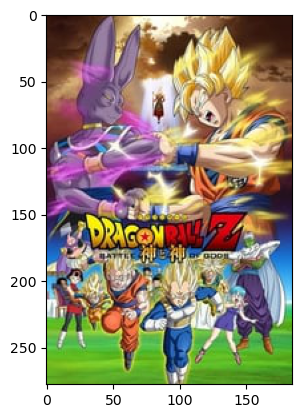

In [11]:
plt.imshow(np.transpose(images[5],(1,2,0)))

In [12]:
len(dataset)

600